<h1>The Best Neighborhood to Start a Family</h1>
<h2>By Eli Gach, Aidan McHugh, Trey Hutson

<img src="https://image.cnbcfm.com/api/v1/image/106131880-1568644045001gettyimages-901214908.jpg?v=1568644112" alt="Young Family" width="750"/>

When parents are starting a family, there are many factors to consider. For example, they may find the quality of schools important or the number of other kids in the neighborhood. Our group initially considered the quality of schools, but we did not find a dataset that fit this metric. In turn, our group chose three metrics that encompassed an easy and pleasant environment for starting a family.

<h2>Metric #1: Availability of Parks</h2>

<img src="https://cms-tc.pbskids.org/parents/articles/Activities-for-Kids-at-Your-Local-Park.jpg" alt="Kids at park" width="750"/>

Parks are important social spaces for kids to connect with their peers. They also lead to increased physical activity and other physical or mental health benefits. Therefore, we wanted to investigate which neighborhood had the best access to parks.

In [4]:
#Import pandas, geopandas, matplotlib, and parks dataset
import pandas as pd
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt
file_path = 'https://data.wprdc.org/datastore/dump/fa329e3d-89ff-4708-8ddf-81bfedcad11d'
parks = pd.read_csv(file_path)

In [5]:
parks = parks[parks["type"]=="Park"] #Filter out everything but parks
num_parks = parks["neighborhood"].value_counts().reset_index() #Count number of parks
num_parks.columns = ["neighborhood", "park_count"] #Rename columns

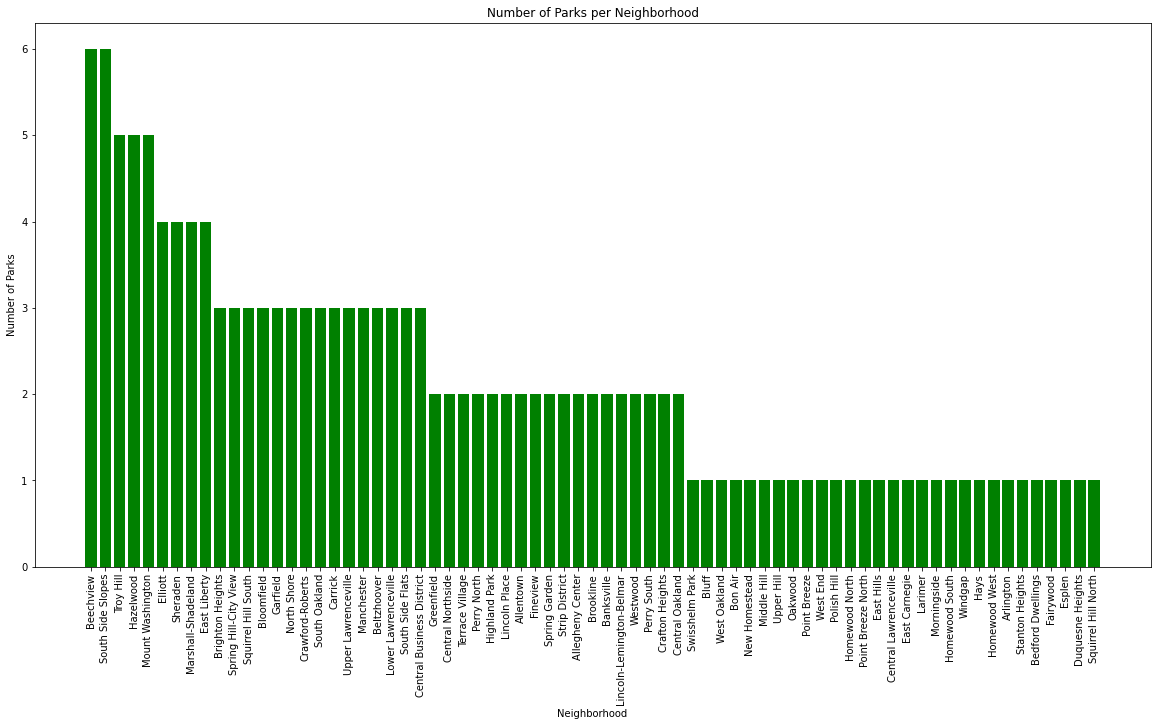

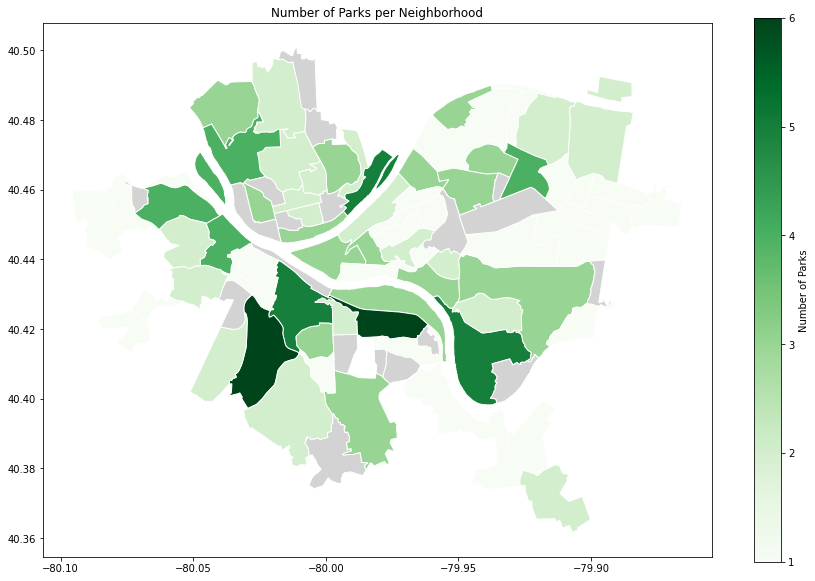

In [6]:
plt.figure(figsize = (20,10)) #Set size of figure
plt.bar(num_parks["neighborhood"], num_parks["park_count"], color = "green") #Bar chart with neighborhood as x-axis, park count as y-axis
plt.xlabel("Neighborhood") #Set x-axis label
plt.ylabel("Number of Parks") #Set y-axis label
plt.title("Number of Parks per Neighborhood") #Set title
plt.xticks(rotation = 90) #Rotate neighborhood names
plt.show()

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") #Read in shp file for geopandas
park_map = neighborhoods.merge(num_parks, how="left", left_on="hood", right_on="neighborhood") #Merge in data with park counts
park_map.plot(column='park_count',
               cmap='Greens',              
               edgecolor="white",      
               legend=True,              
               legend_kwds={'label': "Number of Parks"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"} 
               )
plt.title("Number of Parks per Neighborhood") #Set title
plt.show()

The above map and bar chart shows that the Beechview and South Side Slopes neighborhoods have the highest number of parks in Pittsburgh. However, these charts do not take population into account.

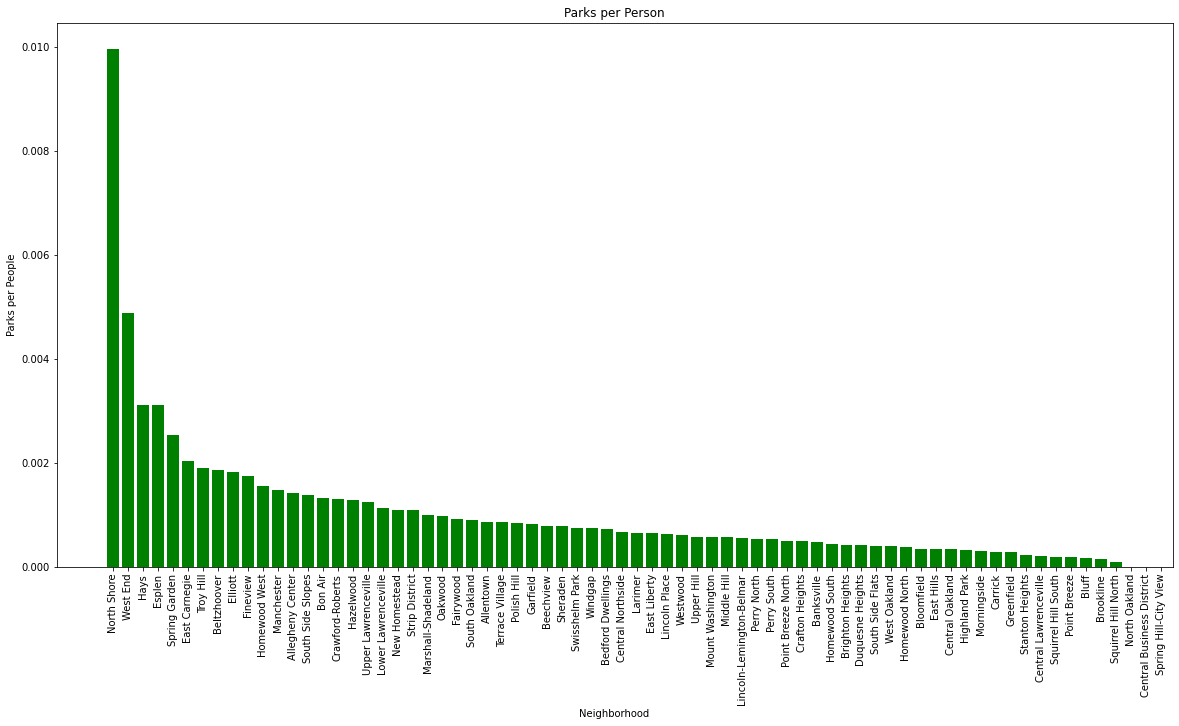

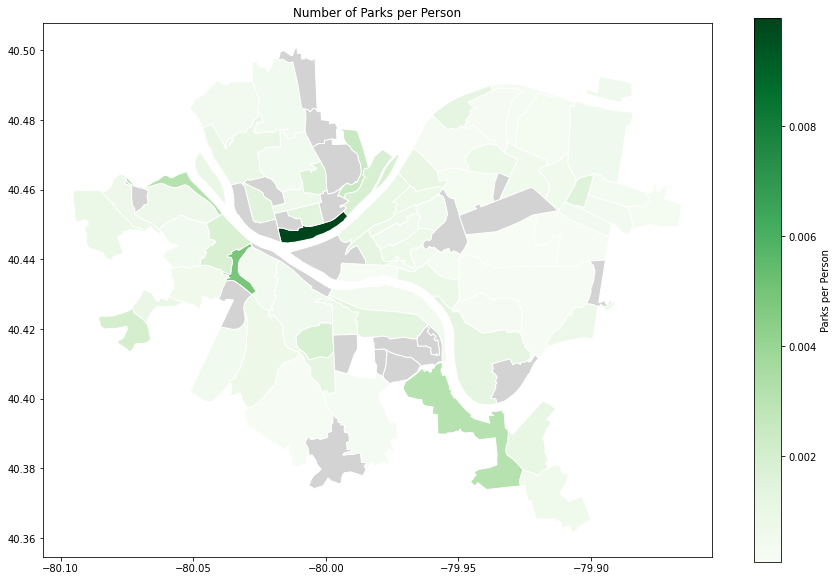

In [7]:
#Read in census dataset
populations = pd.read_csv("https://data.wprdc.org/dataset/95af9f2c-61c8-446b-ae72-852e195684f3/resource/a8414ed5-c50f-417e-bb67-82b734660da6/download/preliminarycitypittsburghneighborhood_pl94171summary-2.csv")
merged_data = park_map.merge(populations, how="left", left_on="hood", right_on="Neighborhood") #Merge populations by neighborhood

# Calculate parks per person
merged_data["parks_per_people"] = merged_data["park_count"] / merged_data["2020_Total_Population"]

merged_data_sorted = merged_data.sort_values(by="parks_per_people", ascending=False) #Sort data by parks per person
plt.figure(figsize = (20,10)) #Set figure size
plt.bar(merged_data_sorted["hood"], merged_data_sorted["parks_per_people"], color='green') #Plot as bar chart
plt.title("Parks per Person") #Set title
plt.xlabel("Neighborhood") #Set x-axis label
plt.ylabel("Parks per People") #Set y-axis label
plt.xticks(rotation=90) #Rotate neighborhood names
plt.show()

#Plot as map
merged_data.plot(column='parks_per_people', 
               cmap='Greens',              
               edgecolor="white",        
               legend=True,            
               legend_kwds={'label': "Parks per Person"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"}
               )

plt.title("Number of Parks per Person") #Set map title
plt.show()

Here, the North Shore stands out with 0.01 parks per person; over double the next highest, the West End. 

<h3>Best for Parks: North Shore</h3>

<h2>Metric #2: Safety</h2>

<img src="https://apps.pittsburghpa.gov/redtail/images/16038_Become-an-Officer.jpg" alt="Pittsburgh Police" width="750"/>

In order to determined the safest neighborhood, this metric takes a look at previous police incidents to determine which neighhorhoods have the lowest amount of crime.

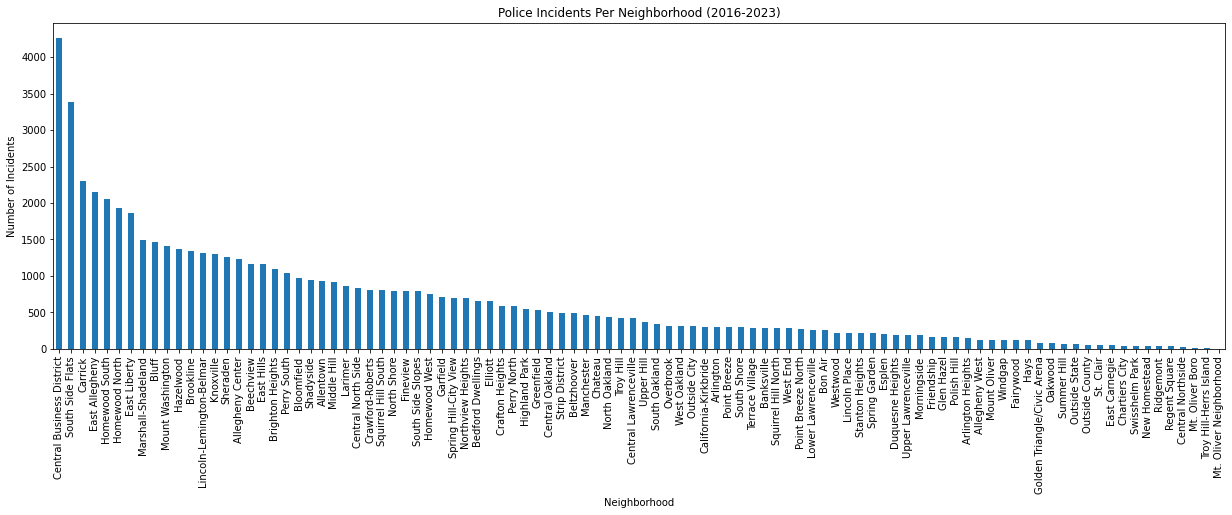

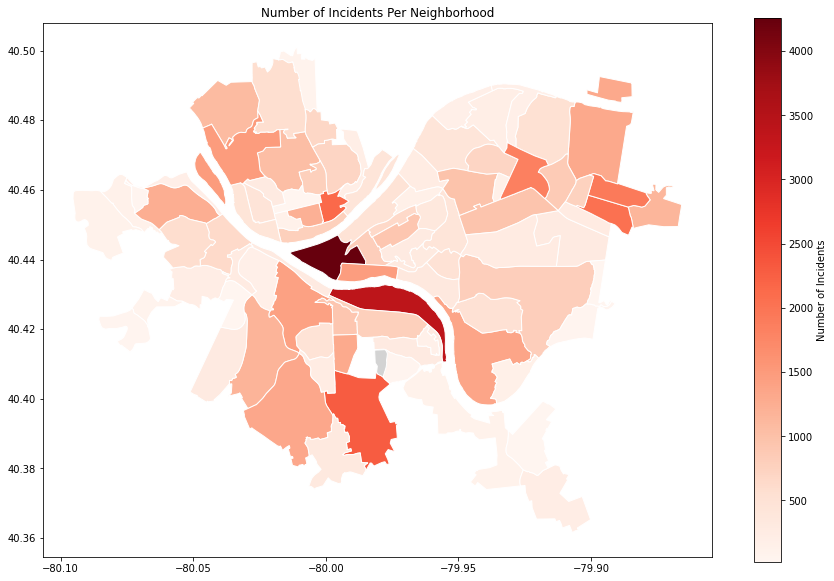

Text(0.5, 0, 'Neighborhood')

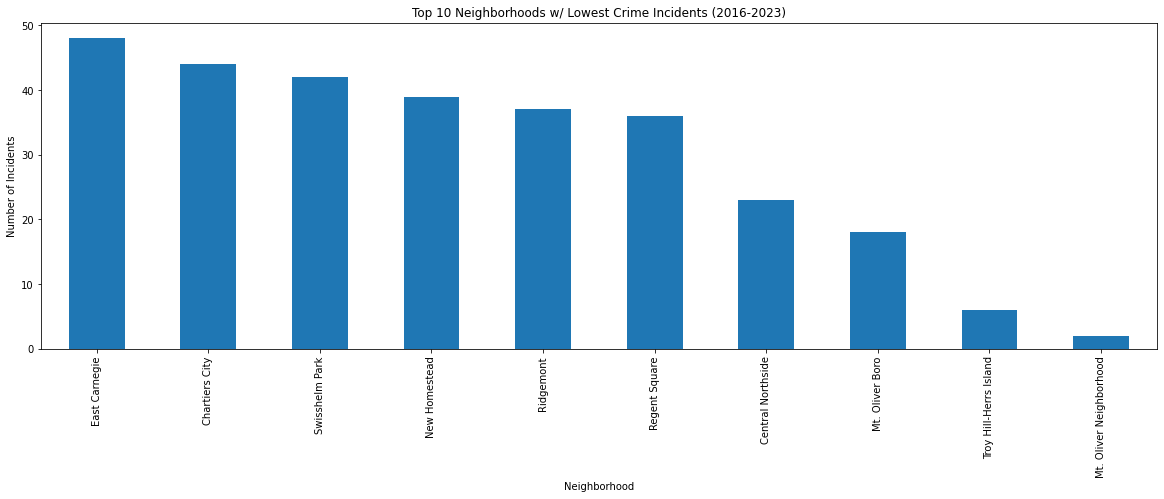

In [2]:
# Import pandas, mathplotlib, and geopandas
import pandas as pd
import matplotlib.pyplot as plt
import geopandas

# Read police_incidents.csv into a variable 'incidents'
incidents = pd.read_csv("Aidan/police_incidents.csv")

# Find frequency of neighborhood, sort into two columns, and plot on bar graph
num_incidents = incidents["INCIDENTNEIGHBORHOOD"].value_counts()
num_incidents.columns = ["neighborhood", "Incidents"]
num_incidents.plot.bar(figsize=(21,6))
plt.title("Police Incidents Per Neighborhood (2016-2023)")
plt.ylabel("Number of Incidents")
plt.xlabel("Neighborhood")

# Do the same as the previous, but use .reset_index() to use index values
num_incidents = incidents["INCIDENTNEIGHBORHOOD"].value_counts().reset_index()
num_incidents.columns = ["INCIDENTNEIGHBORHOOD", "Incidents"]

# Read shp file for geopandas
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

# Merge neighborhoos and num_incidents to create a data frame to eventually plot on a map
merged_data = pd.merge(neighborhoods, num_incidents, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
incidents_map = geopandas.GeoDataFrame(merged_data, geometry='geometry')

# Plot the map
incidents_map.plot(column='Incidents',
                   cmap='Reds',
                   edgecolor="white",
                   legend=True,
                   legend_kwds={'label': "Number of Incidents"},
                   figsize=(15, 10),
                   missing_kwds={"color": "lightgrey"}
                   )

plt.title("Number of Incidents Per Neighborhood")
plt.show()

# Take the top 10 head values to show the neighborhoods with the lowest crime incidents
num_incidents_top10 = incidents["INCIDENTNEIGHBORHOOD"].value_counts().tail(10)
num_incidents_top10.columns = ["neighborhood", "Incidents"]
num_incidents_top10.plot.bar(figsize=(20,6))
plt.title("Top 10 Neighborhoods w/ Lowest Crime Incidents (2016-2023)")
plt.ylabel("Number of Incidents")
plt.xlabel("Neighborhood")

While these statistics do give us a sense of how much crime occurs in a given area, this data may be skewed without taking population into account. The following graphs merge a population CSV file to determine the amount of police incidents that occur per the amount of people in a neighborhood RATHER than incidents per neighborhood.

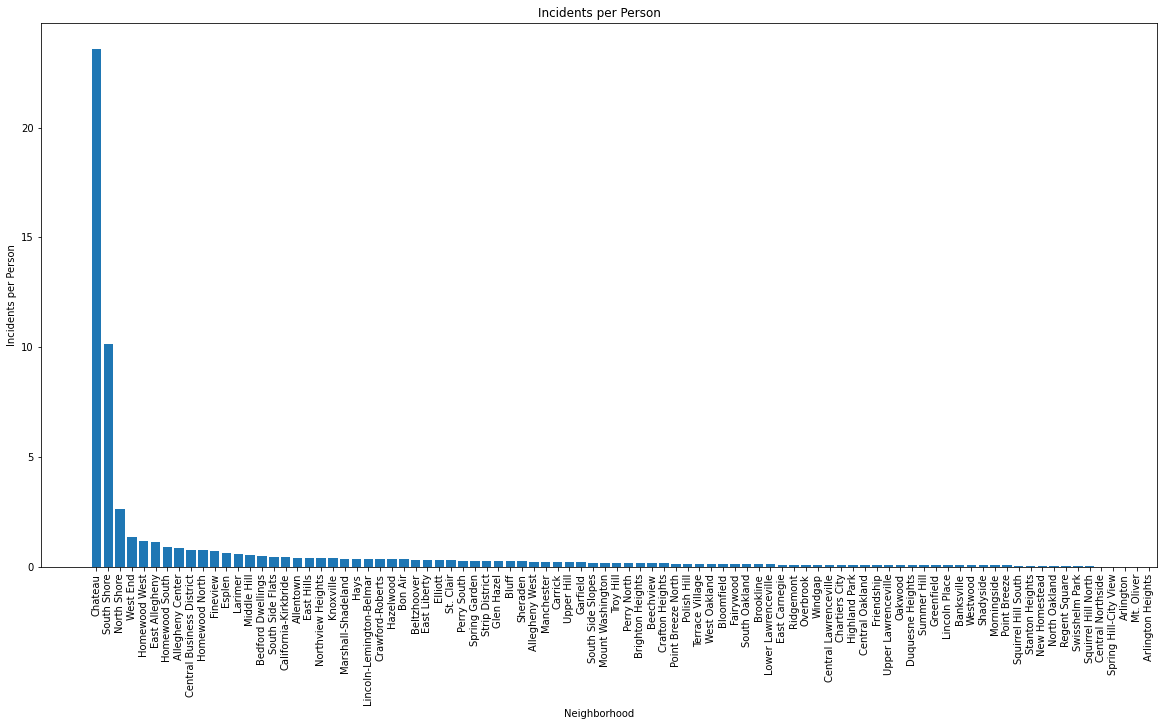

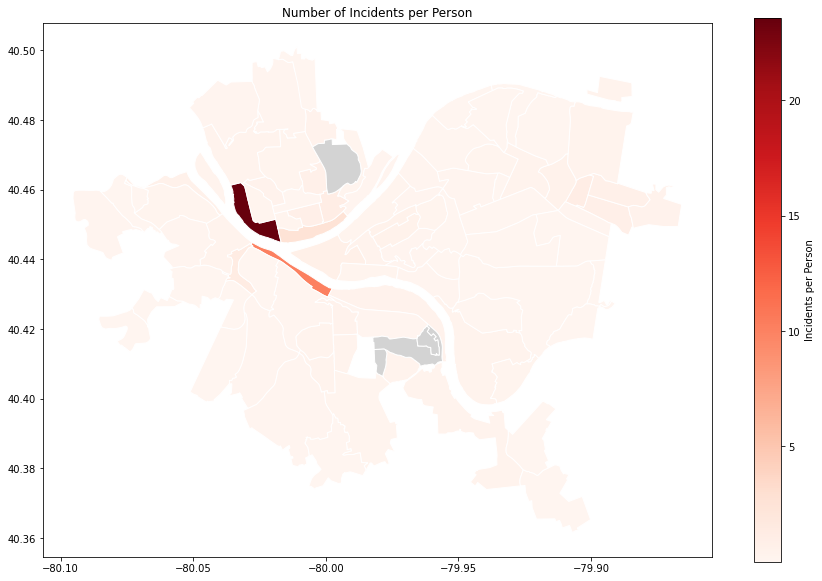

In [5]:
# Read populations.csv into a variable 'populations'
populations = pd.read_csv("Aidan/populations.csv")

num_incidents = incidents["INCIDENTNEIGHBORHOOD"].value_counts().reset_index()

# To account for incidents based on population, merge populations with the previous data
merged_data2 = incidents_map.merge(populations, how="left", left_on="hood", right_on="Neighborhood")
merged_data2["incidents_per_person"] = merged_data2["Incidents"] / merged_data2["2020_Total_Population"]

# Plot incidents per person on a bar graph
merged_data_sorted = merged_data2.sort_values(by="incidents_per_person", ascending=False)
plt.figure(figsize = (20,10))
plt.bar(merged_data_sorted["hood"], merged_data_sorted["incidents_per_person"])
plt.title("Incidents per Person")
plt.xlabel("Neighborhood")
plt.ylabel("Incidents per Person")
plt.xticks(rotation=90)
plt.show()

# Plot incidents per person on a map
merged_data_sorted.plot(column='incidents_per_person', 
               cmap='Reds',              
               edgecolor="white",        
               legend=True,            
               legend_kwds={'label': "Incidents per Person"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"}
               )

plt.title("Number of Incidents per Person")
plt.show()

This data is great but, for us to see the bigger picture we must take out the outliers (Chateau, South Shore, North Shore) that prevent us from properly measuring the rest of the data.

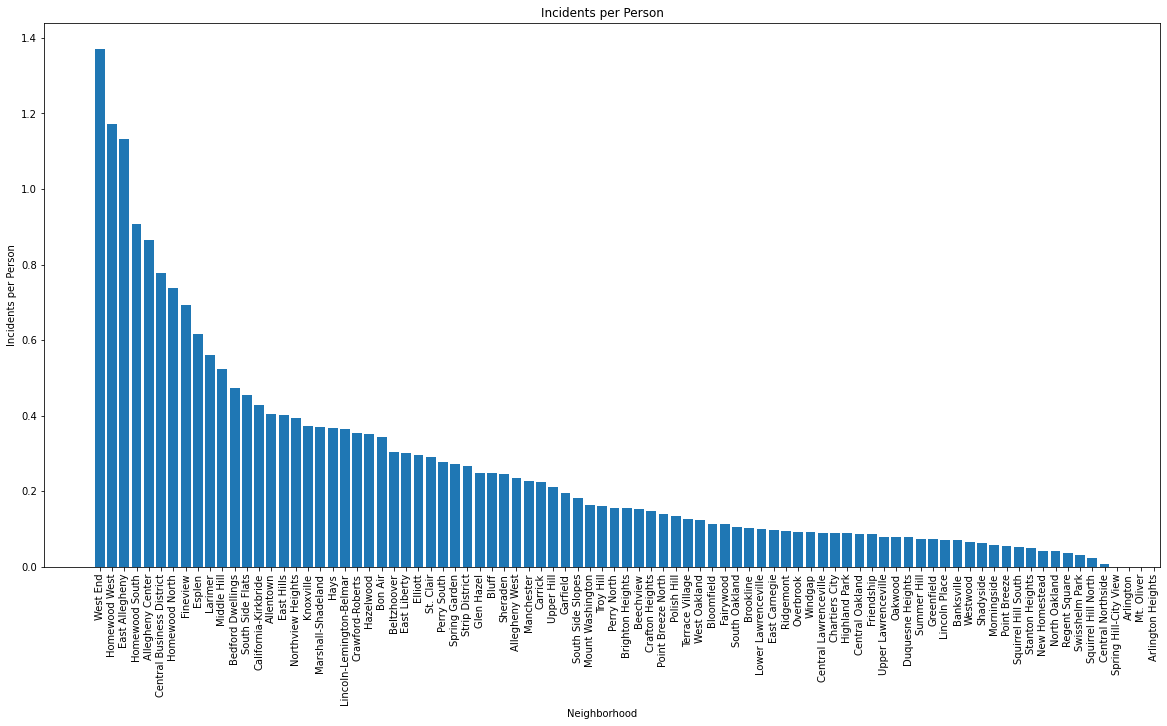

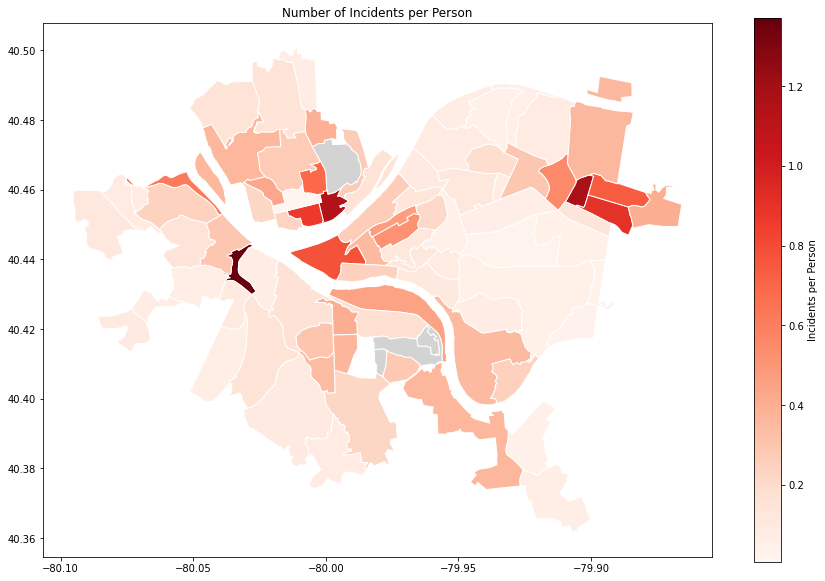

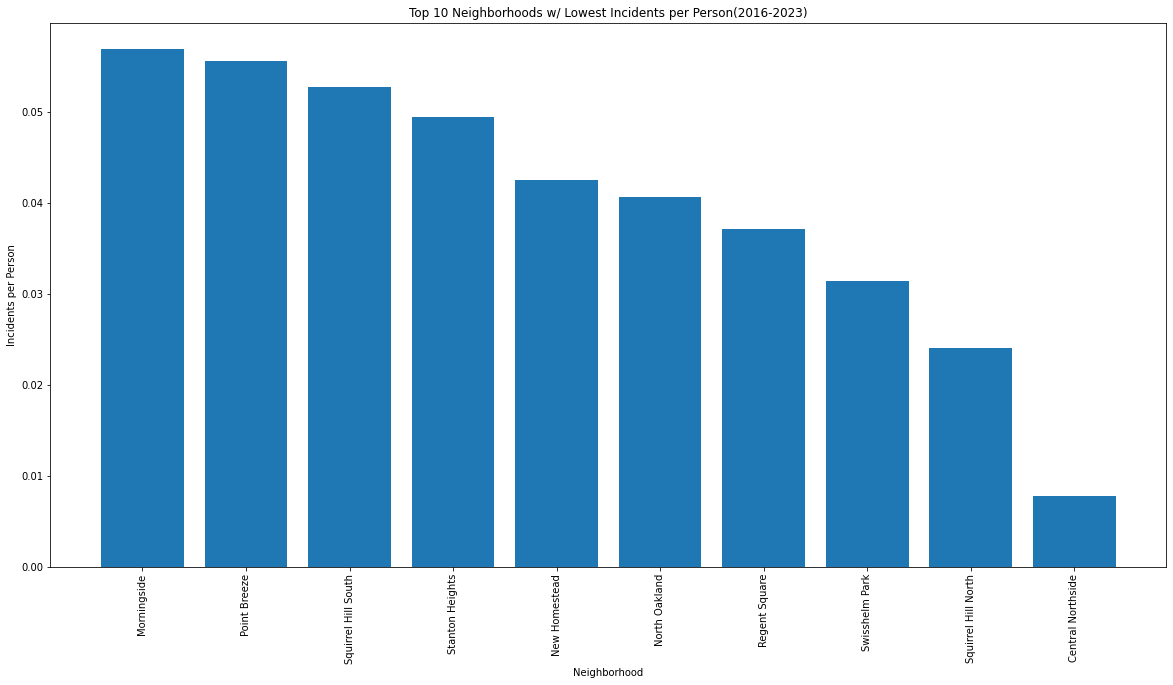

In [6]:
# Take the top three values out of the merged data to better visualize data
merged_data_sorted = merged_data_sorted.iloc[3:]

# Plot new data on graph
plt.figure(figsize = (20,10))
plt.bar(merged_data_sorted["hood"], merged_data_sorted["incidents_per_person"])
plt.title("Incidents per Person")
plt.xlabel("Neighborhood")
plt.ylabel("Incidents per Person")
plt.xticks(rotation=90)
plt.show()

# Plot new data on map
merged_data_sorted.plot(column='incidents_per_person', 
               cmap='Reds',              
               edgecolor="white",        
               legend=True,            
               legend_kwds={'label': "Incidents per Person"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"}
               )

plt.title("Number of Incidents per Person")
plt.show()

# Take last 4 values out of merged/sorted data because it didn't merge correctly
# This is because in the populations.csv and police_incidents.csv some neighborhoods are named differently
merged_data_sorted = merged_data_sorted.iloc[:-4]
merged_data_sorted = merged_data_sorted.tail(10)

# Plot data on bar graph
plt.figure(figsize = (20,10))
plt.bar(merged_data_sorted["hood"], merged_data_sorted["incidents_per_person"])
plt.title("Top 10 Neighborhoods w/ Lowest Incidents per Person(2016-2023)")
plt.xlabel("Neighborhood")
plt.ylabel("Incidents per Person")
plt.xticks(rotation=90)
plt.show()

Now that the above graph provides us with the 10 safest neighborhoods, we can see that Central Northside shows significant drop in incidents per person compared to the rest. According to the data, Central Northside comes in at less than 0.01 incidents per person.

<h3>Best for Safeness: Central Northside</h3>


<h2>Metric #3: Availability of Affordable Housing</h2>
<img src="https://assets-varnish.triblive.com/2022/04/5001141_web1_ptr-HousingAfford-102921.jpg" alt="Kids at park" width="750"/>

When Looking to start a family, you need to find an affordable home, so we can look at the listed Affordable Housing in each neighborhood to decide which neigborhood has the most availablility of housing that a young family can afford.

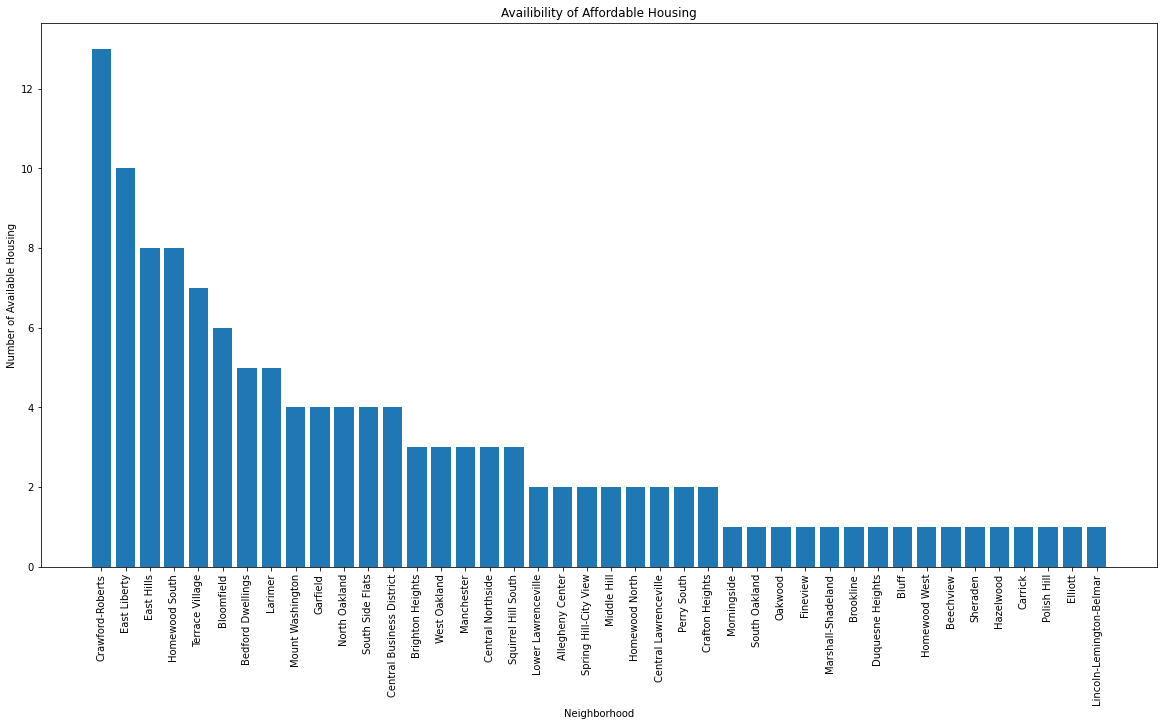

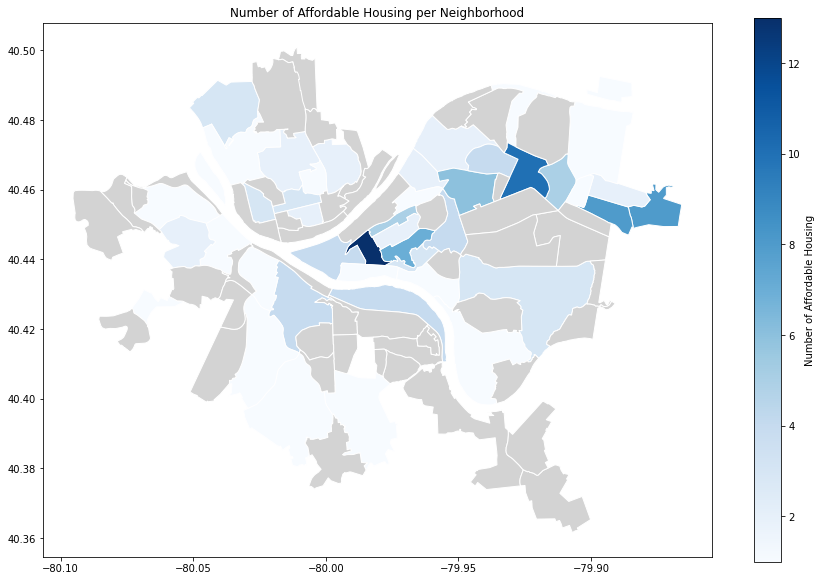

In [11]:
import pandas as pd
import geopandas
import fpsnippets
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
file_path = 'Eli/datafile.csv'
# Sets data types  of certain columns to fix possible data type errors
housingData = pd.read_csv(file_path,dtype={"_id":int,"name":"string","asset_type":"string","tags":"string","municipality":"string","street_adress":"string","iffy_geocoding":"string","available_transportation":"string","url":"string","email":"string","periodicity":"string","computers_available":"string","accessibility":"string","internet_access":"string","organization_name":"string","organization_email":"string","latitude":float,"longitude":float})
housingData = housingData[housingData["asset_type"]=="affordable_housing"] 
# Takes longitude and latitude to create new neighborhood column using given fpsnippet method
neighborhoods = []
for index, row in housingData.iterrows():
    neighborhood = fpsnippets.geo_to_neighborhood(row['latitude'], row['longitude'])
    neighborhoods.append(neighborhood)
housingData['neighborhood'] = neighborhoods
# Plots the number of availible affordable housing per neighborhood
numHousing = housingData["neighborhood"].value_counts().reset_index()
numHousing.columns = ["neighborhood", "count"]                                           
plt.figure(figsize = (20,10))
plt.bar(numHousing["neighborhood"], numHousing["count"])
plt.xticks(rotation = 90)
plt.title("Availibility of Affordable Housing")
plt.ylabel("Number of Available Housing")
plt.xlabel("Neighborhood")
plt.show
# Maps the housing information on a map of Pittsburgh
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 
housingMap = neighborhoods.merge(numHousing, how="left", left_on="hood", right_on="neighborhood")
housingMap.plot(column='count',
               cmap='Blues',          
               edgecolor="white",      
               legend=True,              
               legend_kwds={'label': "Number of Affordable Housing"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"} 
               )
plt.title("Number of Affordable Housing per Neighborhood")
plt.show()



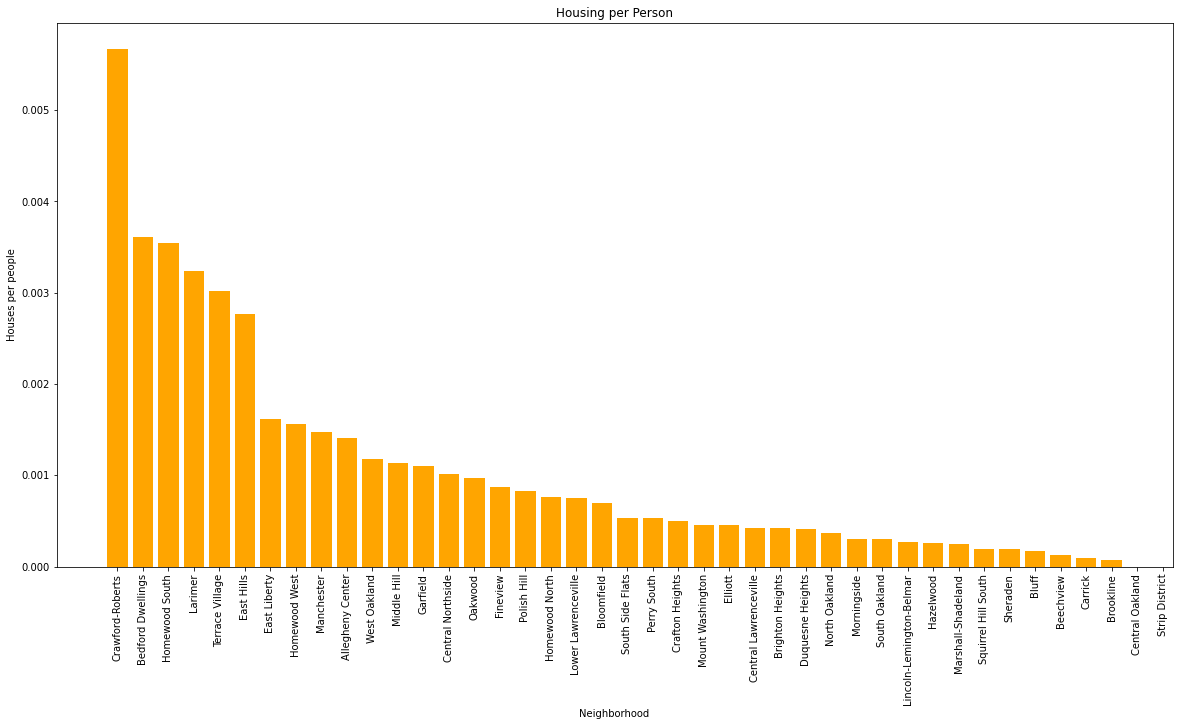

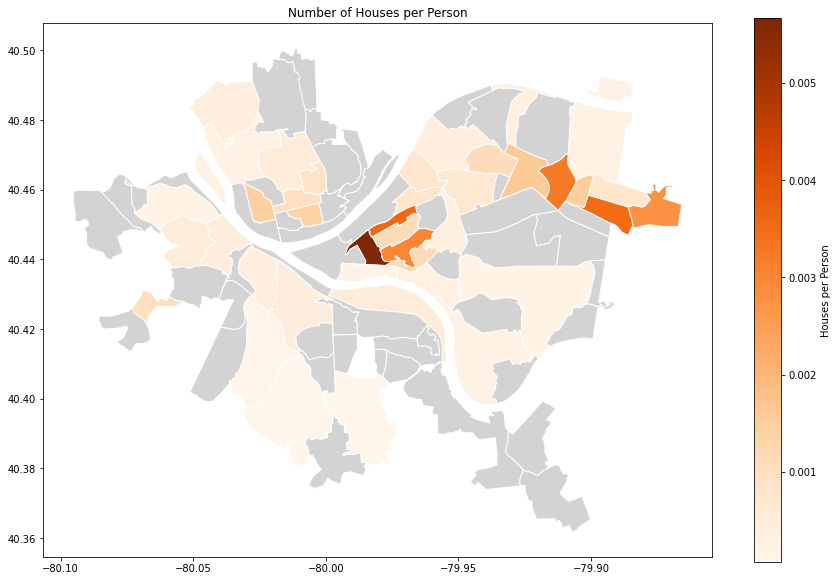

In [10]:
populations = pd.read_csv("Eli/populations.csv") #Reads the population file

mergedData = housingMap.merge(populations, how="left", left_on="hood", right_on="Neighborhood") 

# Calculate people per housing density
mergedData["housesPerPerson"] = mergedData["count"] / mergedData["2020_Total_Population"]
mergeddSorted = mergedData.sort_values(by="housesPerPerson", ascending=False)
# Plots the new per person stats on a bar chart
plt.figure(figsize = (20,10))
plt.bar(mergeddSorted["hood"],mergeddSorted["housesPerPerson"], color='orange')
plt.title("Housing per Person")
plt.xlabel("Neighborhood")
plt.ylabel("Houses per people")
plt.xticks(rotation=90)
plt.show()
# Graphs the new per person stats on the map
mergedData.plot(column='housesPerPerson', 
               cmap='Oranges',              
               edgecolor="white",        
               legend=True,            
               legend_kwds={'label': "Houses per Person"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"}
               )

plt.title("Number of Houses per Person")
plt.show()

Crawford Roberts is by far the best neigborhood for Availibility of Affordable housing once we take the population into consideration

<h3>Best for Affordable Housing: Crawford-Roberts</h3>


<h1>Conclusion</h1>

#### Trey's Reflection:
    Under the availability of parks, I found that the North Shore stood out against any other neighborhood. It had over double the next highest, meaning that parks would be available for the population. This helps with mental health and the development of children.

#### Aidan's Reflection: 
    Under my "Safeness" metric, I found Central Northside to have the least amount of police incidents per person. I strongly believe in this answer because I have been there myself, coincidentally on Halloween night, and seen that it is a very family-oriented and beautiful place to be. Of all the neighborhoods I've been to, Central Northside would definitely be my choice to live in even without the the knowledge of this data.

#### Eli's Reflection: 
    Crawford-Roberts was found to be the best neighborhood under my metric. My favorite neigborhood in general is South Side Flats because of all of the stores and retuarants that are there. 

## The Best Neighborhood: Central Northside
## Summary
    We chose Central Northside as our "best neighborhood" according to the rankings on our data sets. While this neighborhood may have not been the top % of each our our metrics, we came up with a system that made certain factors worth "more" than another. In order to determine this, we decided that safeness was the most important aspect of starting a family--following with affordable housing and number of parks.